In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
# import data
data = pd.read_csv("clinical.csv")


## Kaplan-Meier Analysis
- Gnerate Kaplan-Meier survival curves for at least two distinct groups (e.g., treatment
type, age group, or tumor stage), ensuring each group has its own plot.  
- For each plot, conduct a log-rank test to compare survival differences between the
groups.


In [122]:
# change data type
data['Status'] = data['Status'].apply(lambda x: 0 if x == "Dead" else 1)
data.head()

# subsetting groups
current =data[data["Smoking Status"] == "Current"]
current.head()
nonsmoker =data[data["Smoking Status"] == "Non-smoker"]
nonsmoker.head()


,patient_id,Age,Sex,ECOG PS,Smoking PY,Smoking Status,Ds Site,Subsite,T,N,...,Local,Date Local,Regional,Date Regional,Distant,Date Distant,2nd Ca,Date 2nd Ca,RADCURE-challenge,ContrastEnhanced
4,RADCURE-0010,59.7,Female,ECOG 0,0,Non-smoker,Oropharynx,Tonsillar Fossa,T4b,N0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
14,RADCURE-0021,69.3,Male,ECOG 0,0,Non-smoker,Oropharynx,Tonsil,T4a,N2b,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
25,RADCURE-0035,70.0,Male,ECOG 1,0,Non-smoker,Oropharynx,Tonsillar Fossa,T2,N0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
31,RADCURE-0042,62.0,Male,ECOG 0,0,Non-smoker,Larynx,Glottis,T1a,N0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
38,RADCURE-0050,63.5,Female,ECOG 1,0,Non-smoker,Oropharynx,Base of Tongue,T4b,N2c,...,Persistent,2002-12-14,NaN,NaN,Yes,2003-05-13,NaN,NaN,0,1


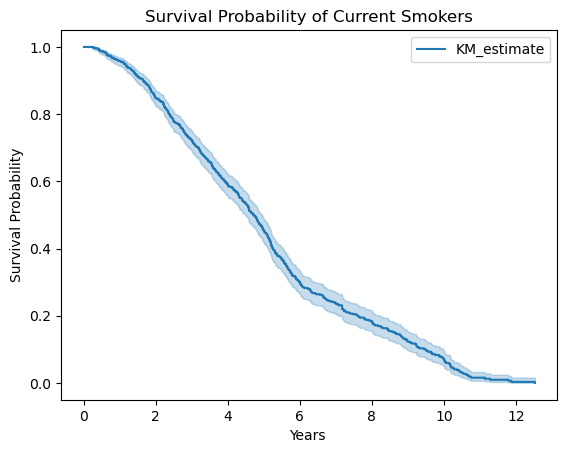

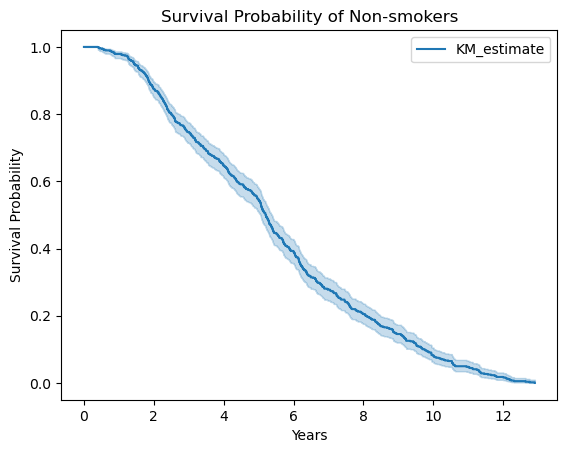

In [141]:
from lifelines.statistics import logrank_test
kmf = KaplanMeierFitter()

kmf.fit(current['Length FU'], event_observed=current['Status'])
kmf.plot_survival_function()
plt.title('Survival Probability of Current Smokers')
plt.xlabel('Years ')
plt.ylabel('Survival Probability')
plt.show()

kmf.fit(nonsmoker['Length FU'], event_observed=nonsmoker['Status'])
kmf.plot_survival_function()
plt.title('Survival Probability of Non-smokers')
plt.xlabel('Years')
plt.ylabel('Survival Probability')
plt.show()

results = logrank_test(
    current['Length FU'], nonsmoker['Length FU'],
    event_observed_A=current['Status'], event_observed_B=nonsmoker['Status']
)



## Cox Proportional Hazards Regression
- Perform a Cox regression analysis, including at least three covariates.
- Validate the proportional hazards assumption.


Length FU      0
Status         0
Age            0
Sex            0
Tx Modality    0
dtype: int64


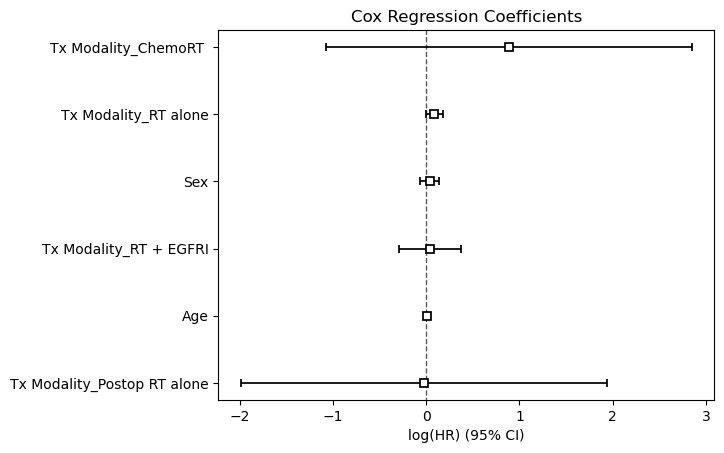

In [137]:
# subsetting data
cox_data = data[["Length FU", "Status", "Age", "Sex", "Tx Modality"]].copy()
# remove missing value
cox_data = cox_data.dropna()
print(cox_data.isna().sum())
# change data type
cox_data['Sex'] = cox_data['Sex'].apply(lambda x: 0 if x == "Female" else 1)

cox_data = pd.get_dummies(cox_data, columns=["Tx Modality"], drop_first=True)


# fit the model & plot the graph
cph = CoxPHFitter()
cph.fit(cox_data, duration_col='Length FU', event_col='Status')
cph.plot()
plt.title('Cox Regression Coefficients')
plt.show()
